## Практическое задание к уроку 4 "Визуальный анализ данных"


### Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

#### 1.1. Скачать следующие данные: kc-house-data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(
    "https://gbcdn.mrgcdn.ru/uploads/asset/5970311/attachment/09507484ecfe95d8cb7ba705c22393bf.csv",
    sep=",",
)
# df = pd.read_csv("kc_house_data.csv", sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2. Изучите распределение стоимости недвижимости

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 [Text(-1000000.0, 0, '−1000000'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1000000'),
  Text(2000000.0, 0, '2000000'),
  Text(3000000.0, 0, '3000000'),
  Text(4000000.0, 0, '4000000'),
  Text(5000000.0, 0, '5000000'),
  Text(6000000.0, 0, '6000000'),
  Text(7000000.0, 0, '7000000'),
  Text(8000000.0, 0, '8000000'),
  Text(9000000.0, 0, '9000000')])

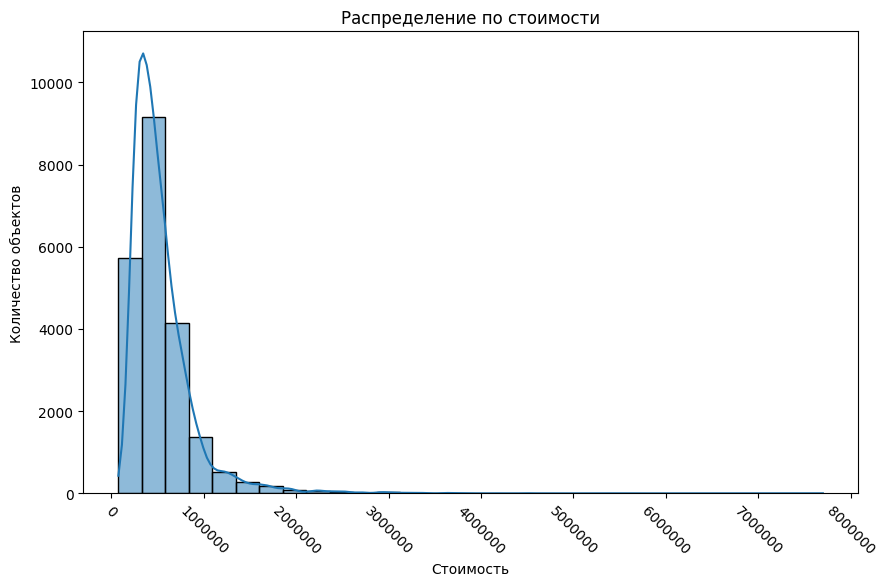

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="price", bins=30, kde=True)
plt.title("Распределение по стоимости")
plt.xlabel("Стоимость")
plt.ylabel("Количество объектов")
plt.ticklabel_format(style="plain", axis="x")
plt.xticks(rotation=-45)

Вывод:

Большинство объектов стоит до 1 млн., с увеличением стоимости количество объектов уменьшается

#### 1.3. Изучите распределение квадратуры жилой

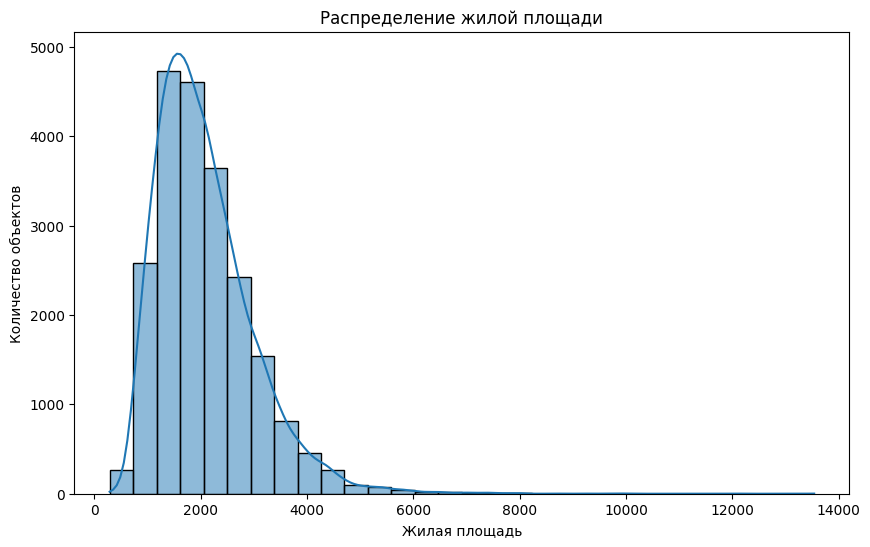

In [5]:
# bins = 20
# w = (df["sqft_living"].max() - df["sqft_living"].min()) / bins * 0.9

# plt.figure(figsize=(10, 4))
# plt.hist(df["sqft_living"], bins=bins, width=w)
# plt.title("Распределение жилой площади")
# plt.xlabel("Жилая площадь")
# plt.ylabel("Количество домов")
# plt.xticks(rotation=-45)
# plt.ticklabel_format(style="plain", axis="x")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="sqft_living", bins=30, kde=True)
plt.title("Распределение жилой площади")
plt.xlabel("Жилая площадь")
plt.ylabel("Количество объектов")
plt.ticklabel_format(style="plain", axis="x")

Вывод:

Большинство объектов имеет жилую площадь от 1000 до 3000

#### 1.4. Изучите распределение года постройки

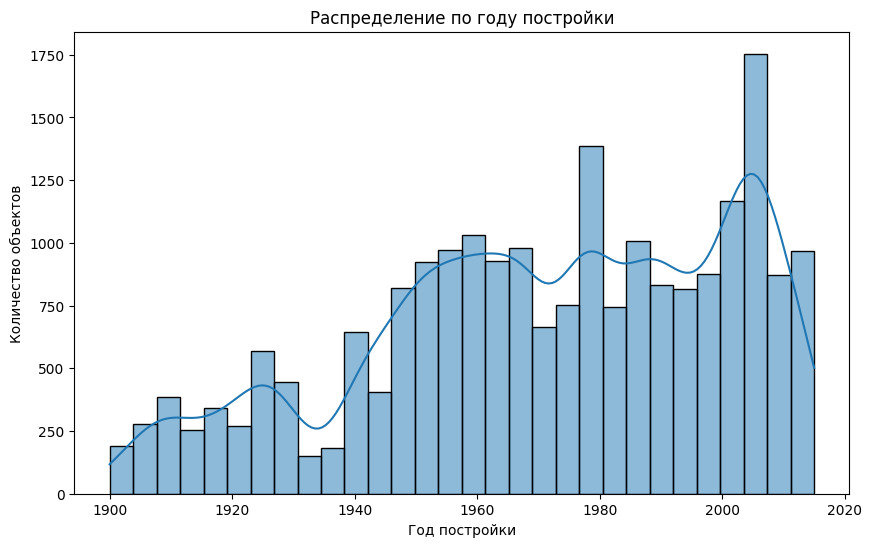

In [6]:
# plt.figure(figsize=(10, 4))
# plt.hist(df["yr_built"], bins=10, width=10)
# plt.title("Распределение по году постройки")
# plt.xlabel("Год постройки")
# plt.ylabel("Количество домов")
# plt.xticks(rotation=-45)
# plt.ticklabel_format(style="plain", axis="x")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="yr_built", bins=30, kde=True)
plt.title("Распределение по году постройки")
plt.xlabel("Год постройки")
plt.ylabel("Количество объектов")
plt.ticklabel_format(style="plain", axis="x")

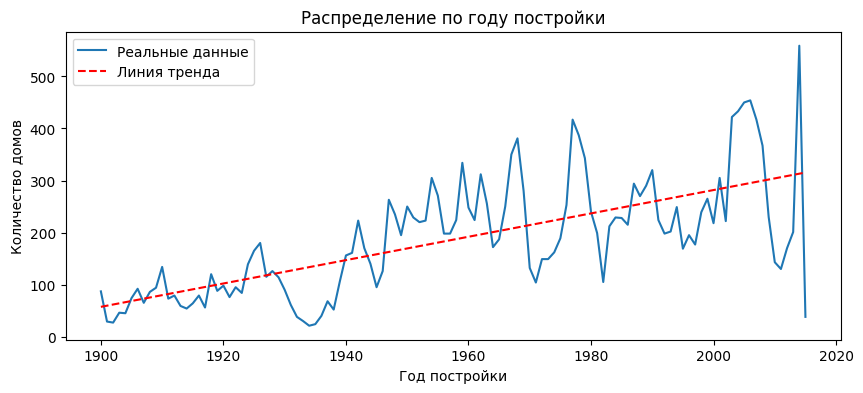

In [7]:
count_per_year = df["yr_built"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.plot(count_per_year.index, count_per_year.values, label="Реальные данные")

# Вычисляем параметры линии тренда
z = np.polyfit(count_per_year.index, count_per_year.values, 1)
p = np.poly1d(z)
# Добавляем линию тренда на график
plt.plot(count_per_year.index, p(count_per_year.index),
         "r--", label="Линия тренда")

plt.title("Распределение по году постройки")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.legend()

Вывод:

Имеется устойчивый тренд увеличения количества более новых объектов

### Условие 2: 2 задача
#### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

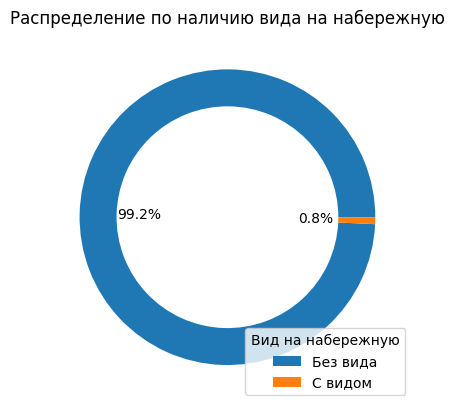

In [8]:
data = df["waterfront"].value_counts().sort_index()

names = data.index
values = data.values

plt.pie(values, autopct="%.1f%%", wedgeprops=dict(width=0.25))
plt.title("Распределение по наличию вида на набережную")
plt.legend(["Без вида", "С видом"], title="Вид на набережную", loc="lower right")

Вывод:

Менее одного процента объектов имеет вид на набережную

#### 2.2. Изучите распределение этажей домов


Text(0, 0.5, 'Количество домов')

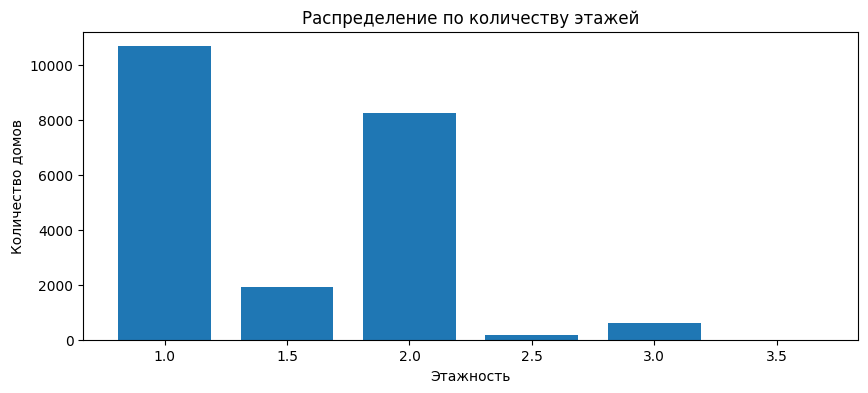

In [9]:
data = df["floors"].value_counts().sort_index()
names = data.index
values = data.values

w = (names.max() - names.min()) / (data.size * 1.1)
plt.figure(figsize=(10, 4))
plt.bar(names, values, width=w, align="center")
plt.title("Распределение по количеству этажей")
plt.xlabel("Этажность")
plt.ylabel("Количество домов")

Вывод:

Большинство домов имеет 1 или 2 этажа

#### 2.3. Изучите распределение состояния домов

Text(0, 0.5, 'Количество домов')

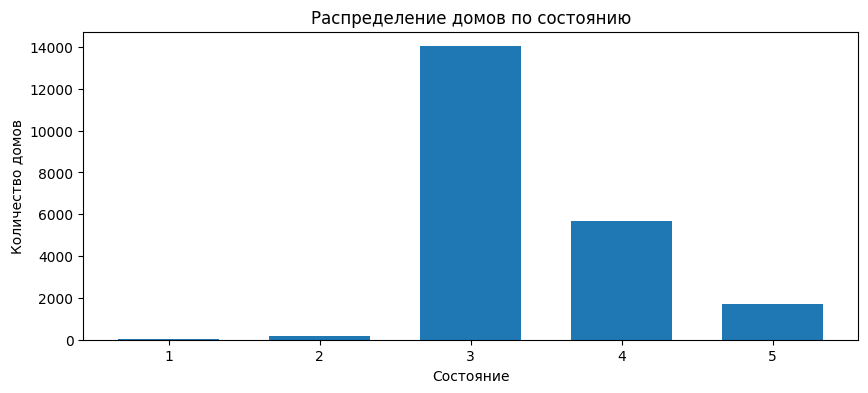

In [10]:
data = df["condition"].value_counts().sort_index()
names = data.index
values = data.values

w = (names.max() - names.min()) / (data.size * 1.2)
plt.figure(figsize=(10, 4))
plt.bar(names, values, width=w, align="center")
plt.title("Распределение домов по состоянию")
plt.xlabel("Состояние")
plt.ylabel("Количество домов")

Вывод:

Большинство домов находится в удовлетворительном или лучшем состоянии (3 и более)

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
corr_matrix = df[
    [
        "price",
        "bedrooms",
        "bathrooms",
        "sqft_living",
        "sqft_lot",
        "floors",
        "waterfront",
        "view",
        "condition",
        "grade",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
    ]
].corr()

corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

<Axes: >

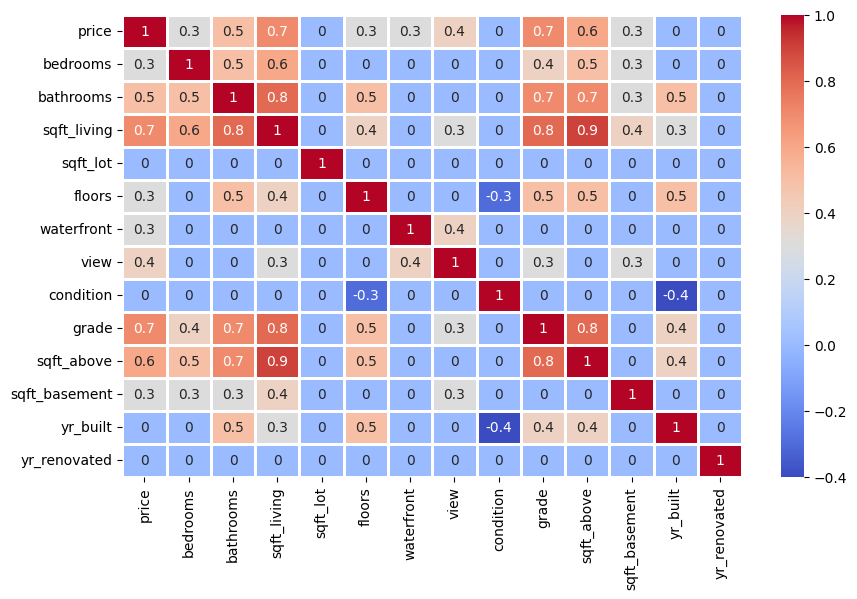

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap="coolwarm")


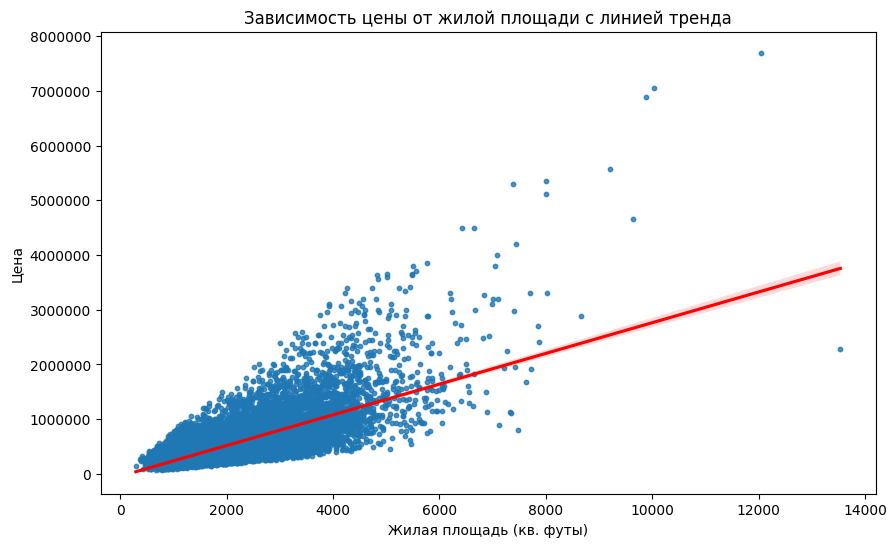

In [13]:
# Построение линейного графика зависимости цены от жилой площади
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="sqft_living",
    y="price",
    scatter_kws={"s": 10},
    line_kws={"color": "red"},
)
plt.title("Зависимость цены от жилой площади с линией тренда")
plt.xlabel("Жилая площадь (кв. футы)")
plt.ylabel("Цена")
plt.ticklabel_format(style="plain", axis="y")

Это диаграмма, показывающая взаимосвязь между общей жилой площадью (sqft_living) и ценой.

Из графика видно, что существует положительная тенденция увеличения цены с увеличением жилой площади.

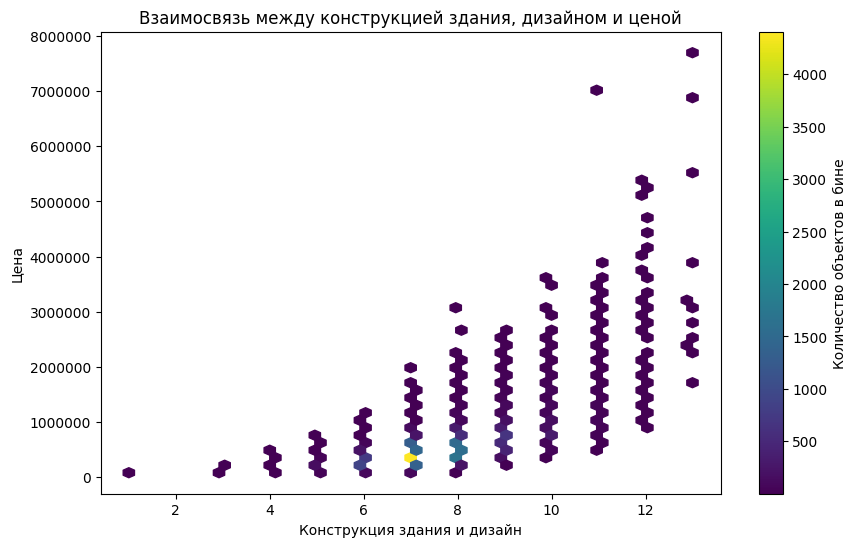

In [14]:
plt.figure(figsize=(10, 6))

# Построение Hexbin Plot
plt.hexbin(df["grade"], df["price"], gridsize=50, mincnt=1)
plt.colorbar(label="Количество объектов в бине")

# Заголовок и подписи осей
plt.title("Взаимосвязь между конструкцией здания, дизайном и ценой")
plt.xlabel("Конструкция здания и дизайн")
plt.ylabel("Цена")
plt.ticklabel_format(style="plain", axis="y")

Цвет каждого шестиугольника отражает количество объектов недвижимости, попадающих в соответствующий диапазон значений жилой площади и цены. Параметр gridsize контролирует размер сетки шестиугольников, а cmap задает цветовую палитру. mincnt=1 указывает, что шестиугольники с одним и более объектами будут окрашены.

Из графика видно, что существует прямая зависимость цены от оценки качества материалов и отделки (grade).

/tmp/ipykernel_571/1936023942.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="bathrooms", y="price", data=df, ci=None)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '0.75'),
  Text(3, 0, '1.0'),
  Text(4, 0, '1.25'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.75'),
  Text(7, 0, '2.0'),
  Text(8, 0, '2.25'),
  Text(9, 0, '2.5'),
  Text(10, 0, '2.75'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.25'),
  Text(13, 0, '3.5'),
  Text(14, 0, '3.75'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.25'),
  Text(17, 0, '4.5'),
  Text(18, 0, '4.75'),
  Text(19, 0, '5.0'),
  Text(20, 0, '5.25'),
  Text(21, 0, '5.5'),
  Text(22, 0, '5.75'),
  Text(23, 0, '6.0'),
  Text(24, 0, '6.25'),
  Text(25, 0, '6.5'),
  Text(26, 0, '6.75'),
  Text(27, 0, '7.5'),
  Text(28, 0, '7.75'),
  Text(29, 0, '8.0')])

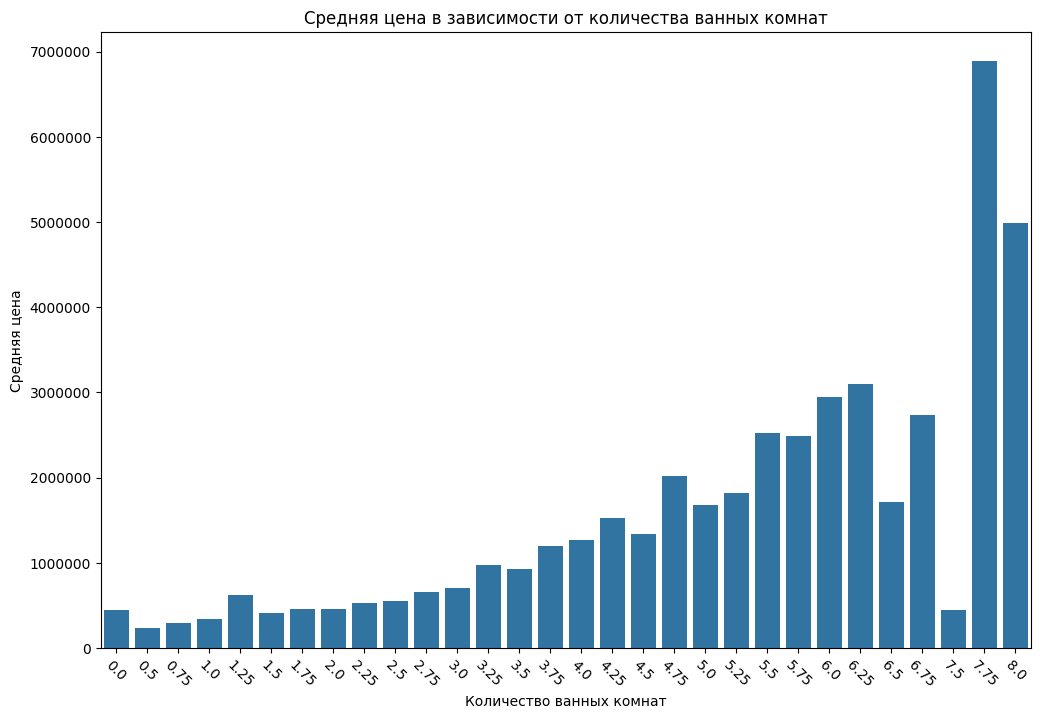

In [15]:
# Построение столбчатой диаграммы для визуализации средней цены в зависимости от количества ванных комнат
plt.figure(figsize=(12, 8))
sns.barplot(x="bathrooms", y="price", data=df, ci=None)
plt.title("Средняя цена в зависимости от количества ванных комнат")
plt.xlabel("Количество ванных комнат")
plt.ylabel("Средняя цена")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=-45)

Эта столбчатая диаграмма для визуализации средней цены в зависимости от количества ванных комнат (bathrooms).

Из графика можно сделать вывод, что чем больше количество ванных комнат, тем больше цена

/tmp/ipykernel_571/434691784.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="view", y="price", data=df, ci=None)


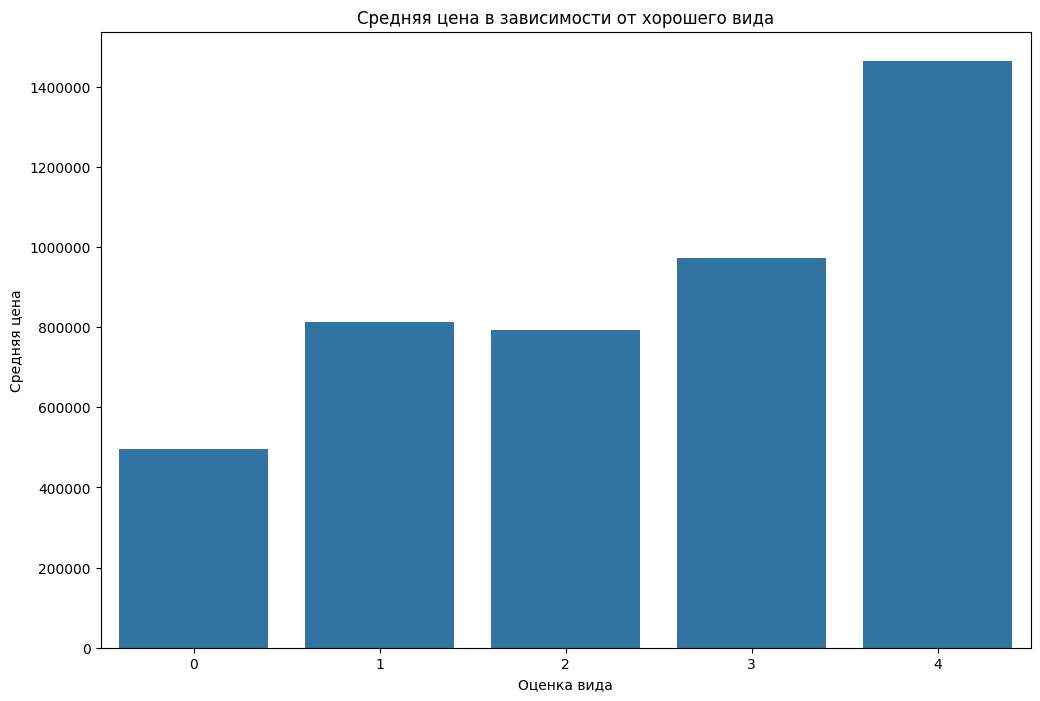

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x="view", y="price", data=df, ci=None)
plt.title("Средняя цена в зависимости от хорошего вида")
plt.xlabel("Оценка вида")
plt.ylabel("Средняя цена")
plt.ticklabel_format(style="plain", axis="y")

Эта столбчатая диаграмма для визуализации средней цены в зависимости от оценки вида из окон.

Из графика можно сделать вывод, что чем лучше вид из окна, тем больше цена

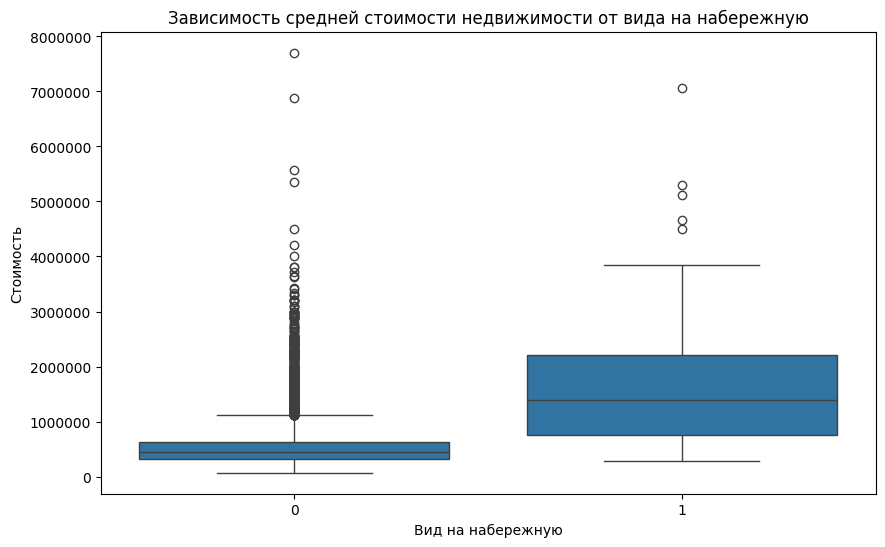

In [22]:
plt.figure(figsize=(10, 6))

# plt.figure(figsize=(12, 8))
# sns.barplot(x="waterfront", y="price", data=df, ci=None)
# plt.title("Зависимость средней стоимости недвижимости от вида на набережную")
# plt.xlabel("Вид на набережную")
# plt.ylabel("Средняя цена")
# plt.ticklabel_format(style="plain", axis="y")


sns.boxplot(x=df["waterfront"], y=df["price"], whis=1.5)

plt.xlabel("Вид на набережную")
plt.ylabel("Стоимость")
plt.title("Зависимость средней стоимости недвижимости от вида на набережную")
plt.ticklabel_format(style="plain", axis="y")

Эта столбчатая диаграмма для визуализации средней цены в зависимости от наличия вида на набережную.

Из графика можно сделать вывод, что наличие вида на набережную увеличивает цену объекта.